<a href="https://colab.research.google.com/github/anselmo-pitombeira/Notebooks/blob/master/Iteracao_valor_controle_estoques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [1]:
import numpy as np
import numpy.random as rd
from numba import njit

## Definição da função que executa a iteração de valor

In [25]:
@njit
def iteracao_valor(S,A,demanda_media,k1,k2,gamma,m,seed,n_iter,tol):

    rd.seed(seed)           ##Seta a seed do gerador de números aleatórios
    v = np.zeros(len(S))    ##Vetor que guarda a função de valor

    for j in range(n_iter):

        v_novo = np.zeros(len(S))    ##Guarda os valores atualizados da função de valor
        politica = np.zeros(len(S))  ##Guarda a decisão em cada estado

        for i in S:
            valor_decisao = []

            for a in A:
                soma = 0
                ##Aproxima o valor esperado por simulação:
                for k in range(m):
                    d = rd.poisson(demanda_media)             ##Amostra a demanda
                    if d > 10*demanda_media:
                        d = 10*demanda_media
                    prox_estado = max(0,i-d+a*(n-i))           ##Computa próximo estado pelo modelo dinâmico
                    estoque = prox_estado
                    perda = abs(min(0, i-d+a*(n-i)))
                    custo_imediato = k1*estoque+k2*perda
                    valor_simulado = custo_imediato+gamma*v[prox_estado]
                    soma+=valor_simulado

                valor_esperado = soma/m
                valor_decisao.append(valor_esperado)

            ##identifica o menor valor
            valor_decisao = np.array(valor_decisao)
            min_valor = np.min(valor_decisao)
            melhor_decisao = np.argmin(valor_decisao)

            ##Atualiza a função de valor para o estado i
            v_novo[i] = min_valor
            politica[i] = melhor_decisao

        ##Testa critério de parada
        diff = np.max(np.abs(v - v_novo))
        print(diff)
        if diff <  tol:
            v = v_novo
            break
        else:
            v = v_novo

    return v, politica

## Parâmetros

In [47]:
n = 30                ##Capacidade máxima de armazenagem do estoque
S = list(range(n+1))  ##Espaço de estados
A = [0,1]             ##Espaço de decisões: 1 -> repor, 0 -> não repor
k1 = 10               ##Custo de manter estoques
k2 = 50               ##Custo de não atendimento da demanda
demanda_media = 10    ##Demanda média diária (segue uma distribuição de Poisson)
gamma = 0.9           ##Fator de desconto
seed = 42             ##Semente do gerador de números aleatórios
m = 100               ##Tamanho da amostra na aproximação do valor esperado
n_iter = 100         ##Número máximo de iterações
tol = 0.01            ##Tolerância

## Roda a iteração de valor

In [48]:
f_valor, politica = iteracao_valor(S,A,demanda_media,k1,k2,gamma,m,seed,n_iter,tol)


203.1
192.93700000000035
150.31667810000016
125.7443223726001
125.21829564819882
92.84200016485073
85.42384296965031
73.09821619260424
67.32261013703328
76.4010180037476
55.776064659532494
54.06268324145651
48.560123902496684
50.917136066853345
40.91650267034788
38.74774704129254
40.21647676050611
36.917326018696485
50.77749648237341
26.88942686736732
26.187099747100774
28.55221346321059
27.480237755992903
36.20887648875737
16.233187819934983
22.07205107501568
26.18985049002731
31.711856014122304
21.275281809741955
25.84295269804852
19.013566078940585
13.10055271998499
29.89581681041227
15.533314211740844
21.090412697737065
31.998884727110408
20.913150759041173
26.291620747049592
16.268651628416137
13.738644423573305
23.42944556825637
10.776108733833553
13.382695741650195
22.66677545833113
18.259617217016057
7.67818275510308
19.5349628670715
28.82039391687158
29.468037285489572
21.086182744392772
14.386536923865151
27.707531094937167
28.026930024208013
23.308158239570503
18.09694132800

## Política e função de valor ótimas

Política =  [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


Text(0, 0.5, 'Função de valor ótima')

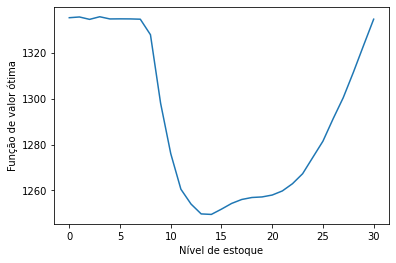

In [46]:
print("Política = ", politica)
import matplotlib.pyplot as plt
plt.plot(f_valor)
plt.xlabel("Nível de estoque")
plt.ylabel("Função de valor ótima")